In [1]:
import matplotlib.pyplot as plt
from _bootstrap import *
from polygon_processors import (
    UrbanRuralPolygonMerger,
    MultipartPolygonRelabeller,
    VoronoiProcessor,
    PolygonPlotter)
from paths import get_paths


# === Base setup ===
input_dir, output_dir,  plots_dir = get_paths()
urban_path = 'manzanas_apc_2023.shp'
rural_path = 'microdatos_entidad.zip'

merger = UrbanRuralPolygonMerger()
merged_data = merger.process(
    urban_path=str(input_dir / urban_path),
    rural_path=str(input_dir / rural_path)
)

multipart_processor = MultipartPolygonRelabeller(input_data=merged_data)
processed_polys = multipart_processor._relabel_multipart_blocks()

In [2]:
def run_all_voronoi_examples():
  scenarios = [
    ("A", False, None),
    ("B", True, False),
    ("C", True, True)
  ]

  fig, axes = plt.subplots(1, 3, figsize=(9, 4))
  for i, (title, process_hidden, overlay_hidden) in enumerate(scenarios):
    voronoi_processor = VoronoiProcessor(
      processed_polys.copy(),
      region_id=13112
    )

    voronoi_polys = voronoi_processor.process(
      region_path=input_dir / "COMUNA_C17.shp",
      barrier_mask_path=input_dir / "hydrographic_network.shp",
      int_region_path=input_dir / "ZONA_C17.shp",
      process_hidden=process_hidden,
      overlay_hidden=overlay_hidden,
      verbose=False
    )

    # Select a consistent target
    target = voronoi_polys[voronoi_polys["block_id"].str.contains("13112081004001")]
    bbox = target.total_bounds

    plotter = PolygonPlotter(voronoi_polys)
    plotter.plot_target_with_context(
      target_gdf=target,
      bbox=bbox,
      pad=50,
      target_color='cyan',
      others_color='black',
      alpha_target=0.8,
      alpha_others=0.3,
      ax=axes[i]
    )

    axes[i].set_title(title, fontsize=12)

  plt.tight_layout()
  plt.savefig(plots_dir / "hidden_polygons.png", dpi=300, bbox_inches='tight')
  plt.show()

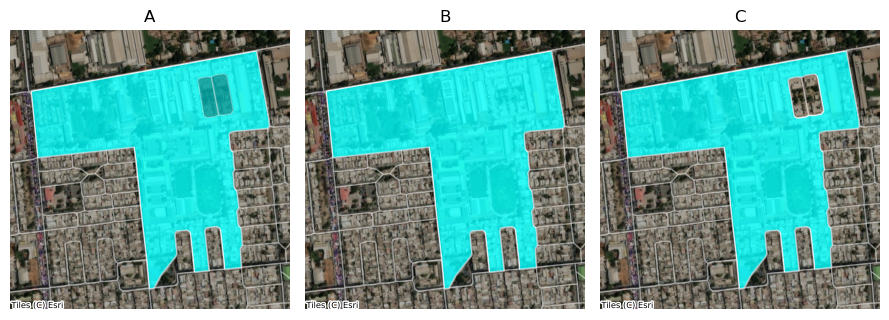

In [3]:
run_all_voronoi_examples()